In [25]:
import os
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
origin_dir = r"/Users/sunhyeoklee/Desktop/AdvanceProject/archive/original/"
resized_dir = r"/Users/sunhyeoklee/Desktop/AdvanceProject/archive/resized/"
gray_dir = r"/Users/sunhyeoklee/Desktop/AdvanceProject/archive/gray/"

In [6]:
origin_files = sorted(glob.glob(origin_dir + '*'))
resized_files = sorted(glob.glob(resized_dir + '*'))
gray_files = sorted(glob.glob(gray_dir + '*'))

In [7]:
print(origin_files[:2])

print(resized_files[:2])

print(gray_files[:2])

['/Users/sunhyeoklee/Desktop/AdvanceProject/archive/original/Victorian1.png', '/Users/sunhyeoklee/Desktop/AdvanceProject/archive/original/Victorian10.png']
['/Users/sunhyeoklee/Desktop/AdvanceProject/archive/resized/Victorian1.png', '/Users/sunhyeoklee/Desktop/AdvanceProject/archive/resized/Victorian10.png']
['/Users/sunhyeoklee/Desktop/AdvanceProject/archive/gray/Victorian1.png', '/Users/sunhyeoklee/Desktop/AdvanceProject/archive/gray/Victorian10.png']


In [ ]:
def read_img_from_bgr_to_rgb(file_path):
    img_arr = cv2.imread(file_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

/Users/sunhyeoklee/Desktop/AdvanceProject/archive/original/Victorian1.png
(714, 750, 3)


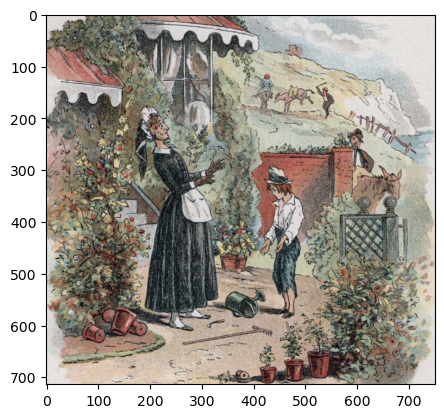

In [ ]:
img_arr = read_img_from_bgr_to_rgb(origin_files[0])

print(origin_files[0])

print(img_arr.shape)

plt.imshow(img_arr)

/Users/sunhyeoklee/Desktop/AdvanceProject/archive/resized/Victorian1.png
(256, 256, 3)


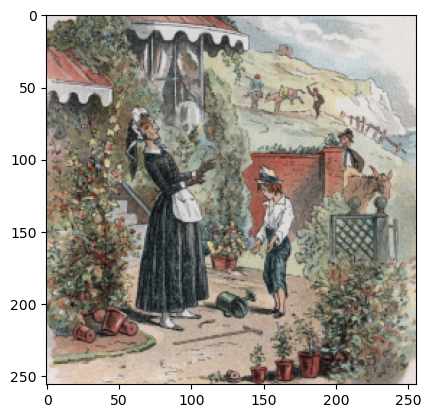

In [ ]:
img_arr = read_img_from_bgr_to_rgb(resized_files[0])

print(resized_files[0])

print(img_arr.shape)

plt.imshow(img_arr)

In [47]:
type(img_arr)

numpy.ndarray

/Users/sunhyeoklee/Desktop/AdvanceProject/archive/gray/Victorian1.png
(256, 256, 3)


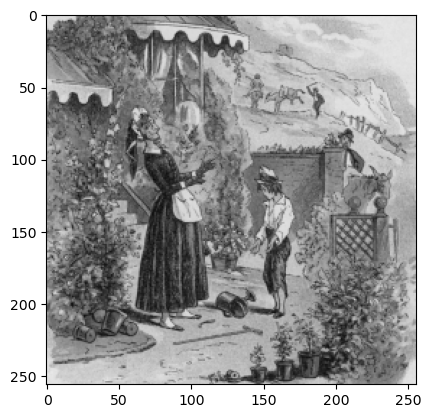

In [ ]:
img_arr = read_img_from_bgr_to_rgb(gray_files[0])

print(gray_files[0])

print(img_arr.shape)

plt.imshow(img_arr)

In [ ]:
def min_max_scaling_and_get_mean_and_std(file_paths):
    global_mean_by_channel = 0
    global_var_by_channel = 0

    for a_img_file_path in file_paths:
        img_arr = read_img_from_bgr_to_rgb(a_img_file_path) / 255
        global_mean_by_channel += img_arr.reshape(-1, 3).mean(axis=0)

    global_mean_by_channel /= len(file_paths)

    # global std 구하기
    for a_img_file_path in file_paths:
        img_arr = read_img_from_bgr_to_rgb(a_img_file_path) / 255
        global_var_by_channel += ((img_arr.reshape(-1, 3) - global_mean_by_channel) ** 2).mean(axis=0)

    global_var_by_channel /= len(file_paths)
    global_std = np.sqrt(global_var_by_channel)

    return global_mean_by_channel, global_std

In [48]:
import os
import glob
import datetime
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [ ]:
class VictorianDataset(Dataset):
    def __init__(self, root, color_transforms_=None, gray_transforms_=None):

        self.color_transforms = transforms.Compose(color_transforms_)
        self.gray_transforms = transforms.Compose(gray_transforms_)
        self.gray_files = sorted(glob.glob(os.path.join(root, "gray") + "/*.*"))
        self.color_files = sorted(glob.glob(os.path.join(root, "resized") + "/*.*"))

    def __getitem__(self, index):

        gray_img = Image.open(self.gray_files[index % len(self.gray_files)]).convert(
            "L"
        )
        color_img = Image.open(self.color_files[index % len(self.color_files)]).convert(
            "RGB"
        )

        gray_img = self.gray_transforms(gray_img)
        color_img = self.color_transforms(color_img)

        return {"A": gray_img, "B": color_img}

    def __len__(self):
        return len(self.gray_files)